In [50]:
import networkx as nx

def jaccard_wt(graph, node):
    """
    The weighted jaccard score, defined in bonus.md.
    Args:
      graph....a networkx graph
      node.....a node to score potential new edges for.
    Returns:
      A list of ((node, ni), score) tuples, representing the 
                score assigned to edge (node, ni)
                (note the edge order)
    """
    #code for jaccard
    denom1 = 0
    
    neighbors = set(graph.neighbors(node))
    scores = []
    #calculating first term in denominator
    for node_val in neighbors:
        #print("The neighbors of node D", node_val)
        denom1 += (graph.degree(node_val))
    #iterating through each neighbor
    for n in graph.nodes():
        denom2 = 0
        numerator_jaccard = 0
        if (node,n) not in graph.edges() and node != n:
            #print("D is compared with", n  )
            neighbors2 = set(graph.neighbors(n))
            #calculating second term in denominator
            for node_val in neighbors2:
                denom2 += (graph.degree(node_val))
                #print("The neighbor is " , node_val)
            #calculating the numerator
            for node_val in (neighbors & neighbors2) :
                numerator_jaccard += (1 / graph.degree(node_val))
                #print("The common neighbor is" , node_val)
                #print("The numerator is ", numerator_jaccard)
            scores.append(((node, n), numerator_jaccard / ((1/denom1) + (1/denom2))))
                    
    return (sorted(scores, key=lambda x: x[1], reverse=True))
    

In [2]:
def example_graph():
    g = nx.Graph()
    g.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('D', 'F'), ('D', 'G'), ('E', 'F'), ('G', 'F')])
    return g


In [27]:
g = example_graph()
train_graph = make_training_graph(g, 'D', 3)

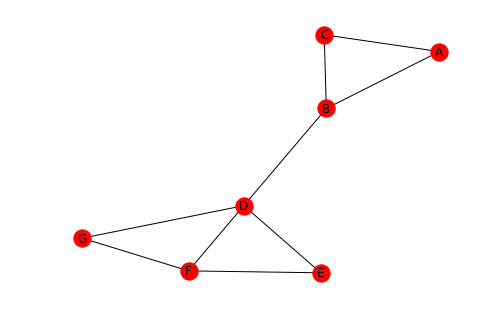

In [20]:

%matplotlib inline
nx.draw(g, with_labels = True)

In [34]:
train_graph.add_edges_from([('G', 'D')])


In [32]:
train_graph.remove_edge(*('D', 'G'))

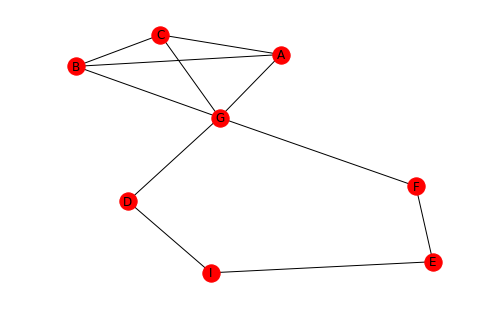

In [35]:
nx.draw(train_graph, with_labels = True)

In [51]:
jaccard_wt(train_graph, 'D')

[(('D', 'E'), 1.2727272727272727),
 (('D', 'A'), 0.8555555555555556),
 (('D', 'B'), 0.8555555555555556),
 (('D', 'C'), 0.8555555555555556),
 (('D', 'F'), 0.7000000000000001)]